## Random Forest

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

In [2]:
# Reading a csv
song_data = pd.read_csv('spotify_song.csv')

In [3]:
# display header
song_data.head()

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,6/14/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),12/13/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),7/5/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,7/19/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),3/5/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
song_data.shape

(32833, 24)

In [5]:
#DataFrame information
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                32833 non-null  int64  
 1   track_id                  32833 non-null  object 
 2   track_name                32828 non-null  object 
 3   track_artist              32828 non-null  object 
 4   track_popularity          32833 non-null  int64  
 5   track_album_id            32833 non-null  object 
 6   track_album_name          32828 non-null  object 
 7   track_album_release_date  32833 non-null  object 
 8   playlist_name             32833 non-null  object 
 9   playlist_id               32833 non-null  object 
 10  playlist_genre            32833 non-null  object 
 11  playlist_subgenre         32833 non-null  object 
 12  danceability              32833 non-null  float64
 13  energy                    32833 non-null  float64
 14  key   

In [6]:
# Check if we have duplicates.
song_data.duplicated().sum()

0

In [7]:
# Check the data for columns with missing numbers (i.e. np.NaN).
song_data.isnull().sum()

Unnamed: 0                  0
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [8]:
#Drop the missing values
song_data.dropna()

#check for missing values again
song_data.isnull().sum()

Unnamed: 0                  0
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [9]:
# Initialize the LabelEncoder
encoder = LabelEncoder()
# Encode the 'track_id' column to convert string identifiers into numerical labels
song_data['track_id'] = encoder.fit_transform(song_data['track_id'])

# Convert the encoded 'track_id' to float64 data type for numerical consistency
song_data['track_id'] = song_data['track_id'].astype('float64')

# Display the 'track_id' column after encoding
song_data['track_id']

0        24150.0
1         3061.0
2         7219.0
3        25699.0
4         5987.0
          ...   
32828    26856.0
32829    18774.0
32830    26465.0
32831    10083.0
32832     7864.0
Name: track_id, Length: 32833, dtype: float64

In [10]:
# Selecting features for modeling from the 'song_data'.

features = song_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode', 'key']]

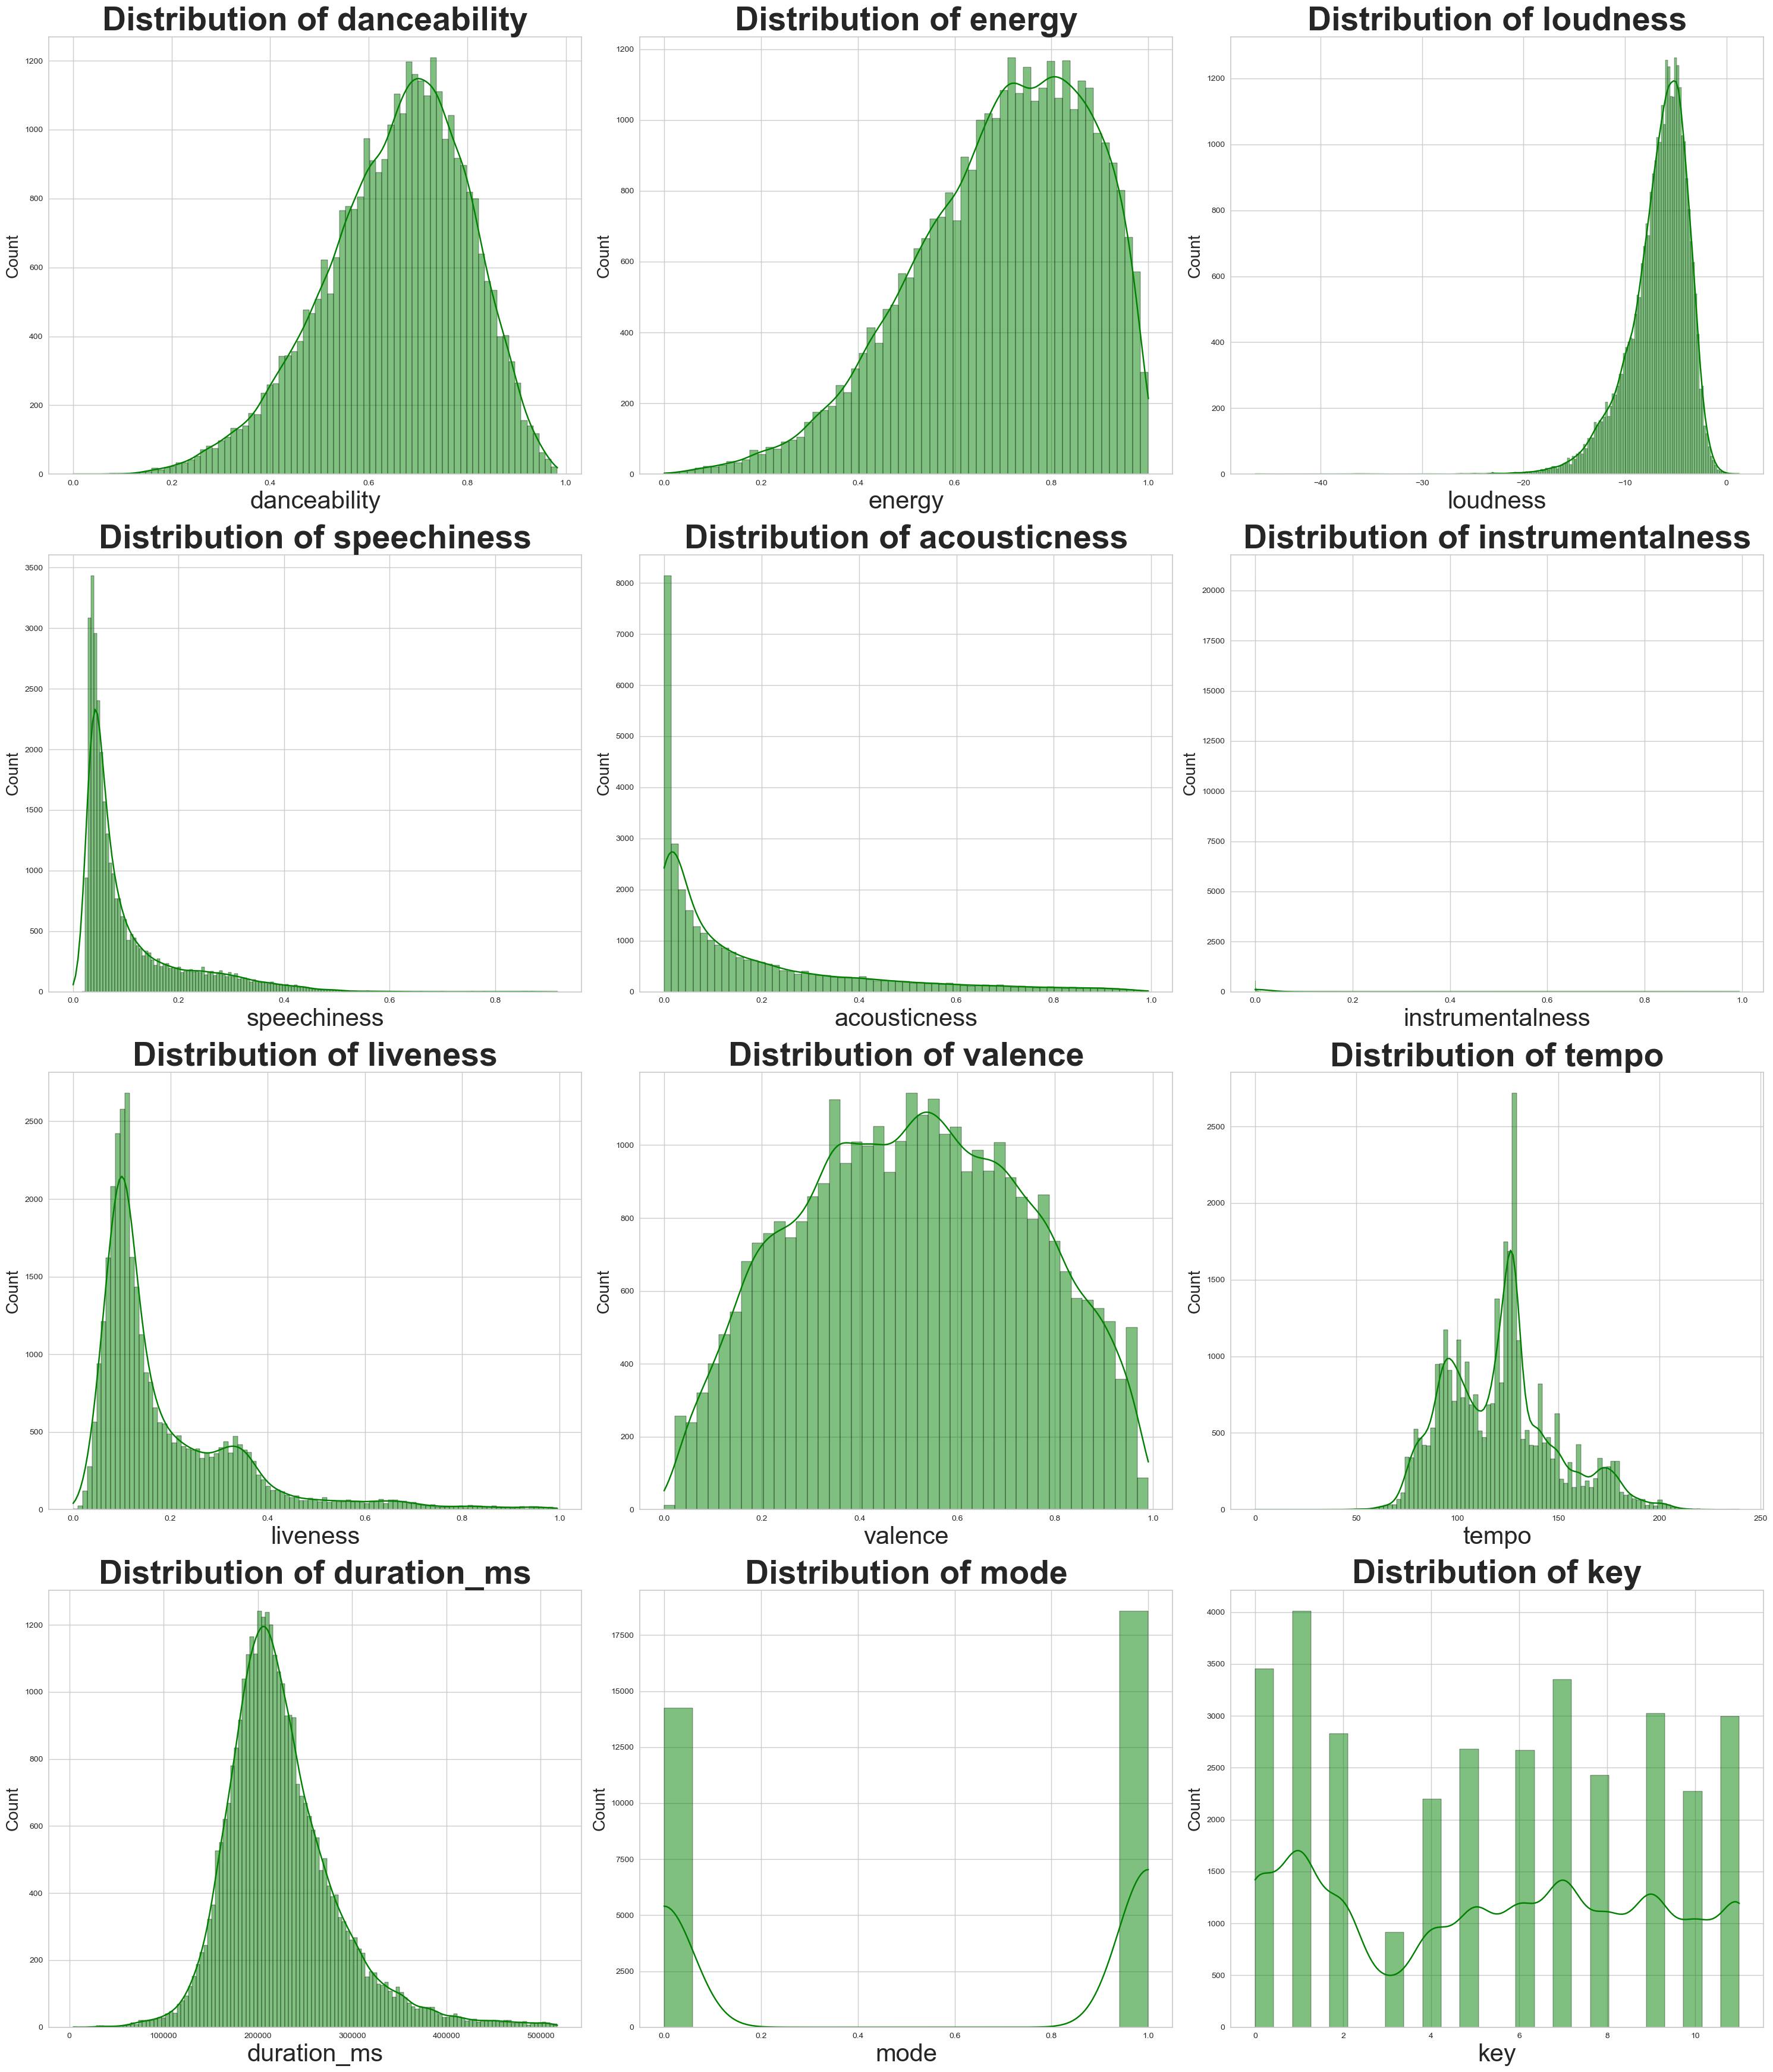

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create distribution plots for each numerical feature
plt.figure(figsize=(30, 35))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(song_data[feature], kde=True, color='green')
    
    # Set title with increased font size and bold font weight
    plt.title('Distribution of {}'.format(feature), fontweight='bold', fontsize=40)
    
    # Set x and y axis labels with increased font size
    plt.xlabel(feature, fontsize=30)
    plt.ylabel('Count', fontsize=20)
    
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


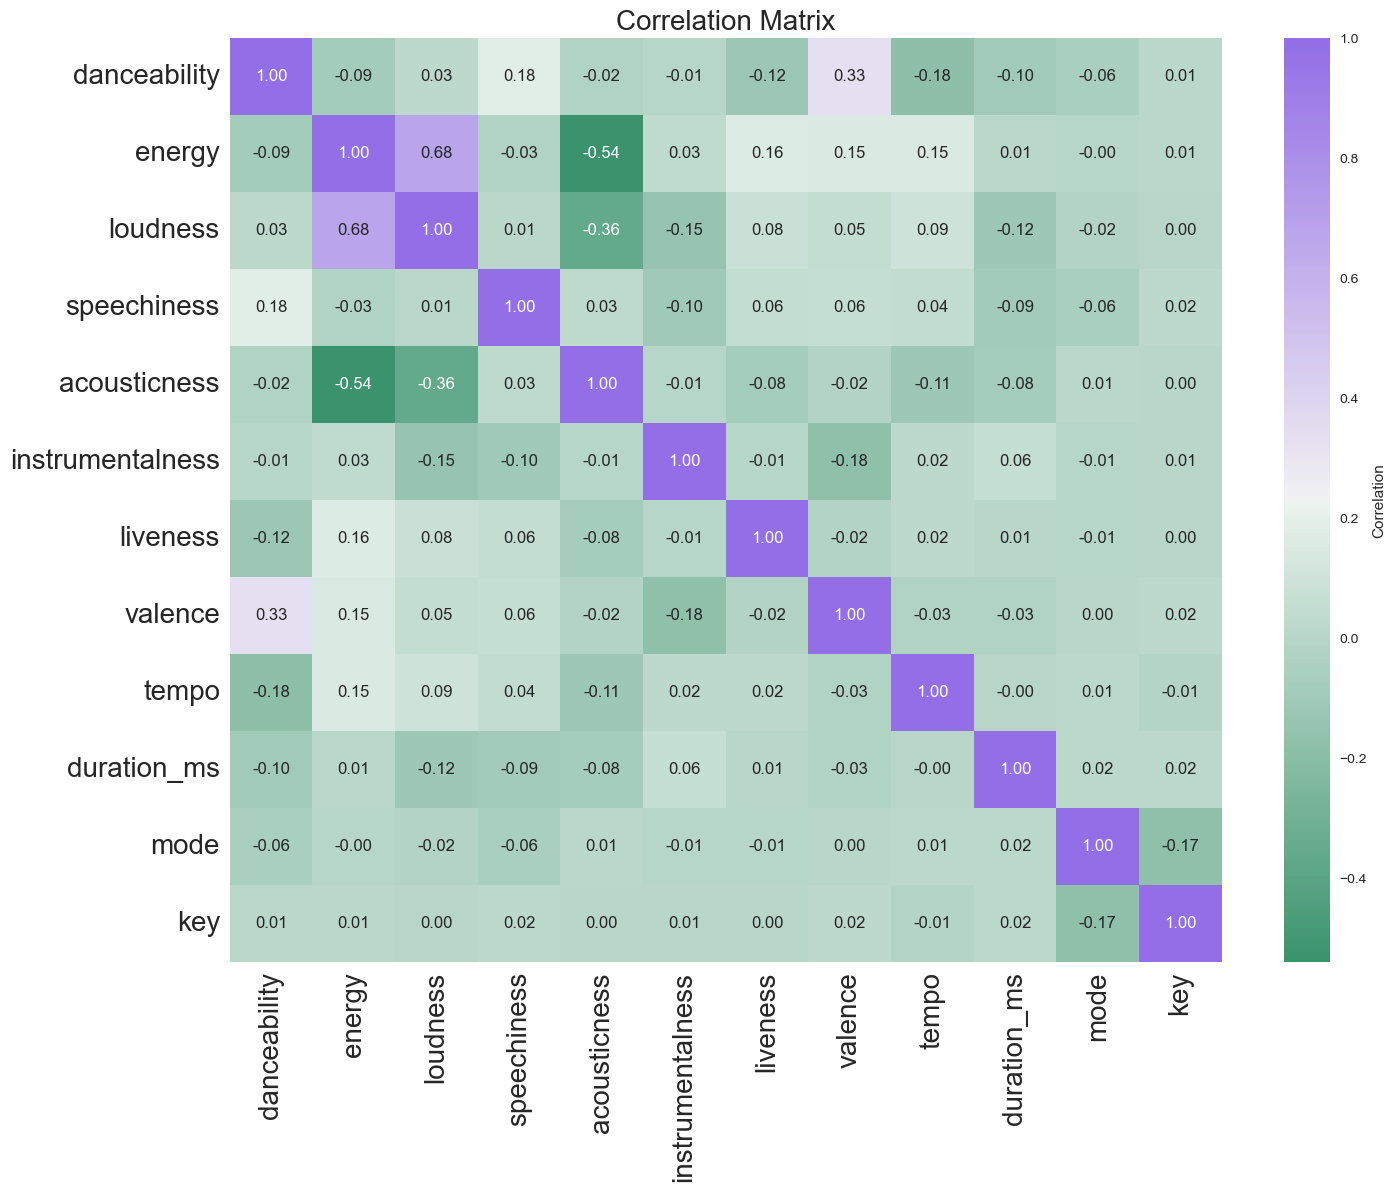

In [12]:
# Calculate correlation matrix
corr_matrix = features.corr()

# Create custom 'coolwarm' colormap leaning towards green
cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, cbar_kws={'label': 'Correlation'}, fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [13]:
# List of features selected based on correlation analysis.

correlated_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode', 'key']

X = song_data[correlated_features].fillna(0)

In [16]:
# Convert 'track_album_release_date' to datetime and extract the year
song_data['track_album_release_date'] = pd.to_datetime(song_data['track_album_release_date'], errors='coerce', infer_datetime_format=True)
song_data['release_year'] = song_data['track_album_release_date'].dt.year
correlated_features.append('release_year')

features_for_modeling = [feature for feature in correlated_features if feature != 'track_popularity']

X_rf = song_data[features_for_modeling]

# Creating a binary target based on 'track_popularity'
popularity_threshold = song_data['track_popularity'].quantile(0.75)
y = (song_data['track_popularity'] >= popularity_threshold).astype(int)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42, stratify=y)

# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Making predictions on the testing set
y_pred = rf_model.predict(X_test_imputed)

# Calculating and printing the classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Score: {f_score}")

/var/folders/6l/833kmrd95qs1wbnrjmr5fx_w0000gn/T/ipykernel_19177/3946343875.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  song_data['track_album_release_date'] = pd.to_datetime(song_data['track_album_release_date'], errors='coerce', infer_datetime_format=True)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      4877
           1       0.85      0.55      0.67      1690

    accuracy                           0.86      6567
   macro avg       0.85      0.76      0.79      6567
weighted avg       0.86      0.86      0.85      6567

Accuracy: 0.8582305466727578
Precision: 0.847846012832264
Recall: 0.5473372781065089
F-Score: 0.6652283351312478


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.impute import SimpleImputer

# User input for song and artist
input_song_title = input("Enter the title of a song: ")
input_artist = input("Enter the artist of the song: ")

# Find the user's song in the dataset
user_song = song_data[(song_data['track_name'] == input_song_title) & (song_data['track_artist'] == input_artist)]

if not user_song.empty:
    # Predict the likelihood of liking for the dataset used in model training
    imputer = SimpleImputer(strategy='mean')
    X_rf_imputed = imputer.fit_transform(X_rf)
    user_song_features_imputed = imputer.transform(user_song[features_for_modeling].values)
    
    probabilities = rf_model.predict_proba(X_rf_imputed)[:, 1]
    
    # Update the main DataFrame with predicted likelihood
    song_data['predicted_likelihood'] = probabilities

    # Calculate cosine similarity for the user's song
    similarities = cosine_similarity(user_song_features_imputed, X_rf_imputed).flatten()
    
    # Filter and sort the DataFrame based on 'predicted_likelihood'
    sorted_indices = np.argsort(-probabilities)  # Indices of songs sorted by decreasing likelihood
    top_similarities_indices = sorted_indices[:20]  # Assuming you want top 20 recommendations
    
    top_recommendations = song_data.iloc[top_similarities_indices].copy()
    top_recommendations['similarity'] = similarities[top_similarities_indices]  # Assign similarities to the top recommendations
    
    print("Top 20 recommended songs based on predicted likelihood of being 'liked' and cosine similarity:")
    print(top_recommendations[['track_name', 'track_artist','release_year', 'predicted_likelihood', 'similarity']])
    
    # Save top recommendations to CSV file
    output_file = "top20_recommendations.csv"
    top_recommendations[['track_name', 'track_artist','release_year', 'predicted_likelihood', 'similarity']].to_csv(output_file, index=False)
    
    print(f"Top recommendations saved to {output_file}")
    
    
else:
    print("Sorry, the input song is not found in the database.")


Enter the title of a song: HIGHEST IN THE ROOM
Enter the artist of the song: Travis Scott


/Users/emd/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Top 20 recommended songs based on predicted likelihood of being 'liked' and cosine similarity:
                              track_name         track_artist  release_year  \
21468                            ROXANNE       Arizona Zervas        2019.0   
23114                           Señorita         Shawn Mendes        2019.0   
23117                          Adore You         Harry Styles        2019.0   
17866                       Desconocidos          Mau y Ricky        2018.0   
23119            My Oh My (feat. DaBaby)       Camila Cabello        2019.0   
23122                          Good News           Mac Miller        2020.0   
25336                         Motivation              Normani        2019.0   
29536                           No Money             Galantis        2016.0   
1179                           Adore You         Harry Styles        2019.0   
23113          RITMO (Bad Boys For Life)  The Black Eyed Peas        2019.0   
17872                           Call